<a href="https://colab.research.google.com/github/jh941213/crawling/blob/main/04_%E1%84%89%E1%85%B5%E1%86%AF%E1%84%8C%E1%85%A5%E1%86%AB%E1%84%8B%E1%85%A7%E1%86%AB%E1%84%89%E1%85%B3%E1%86%B8(%E1%84%8B%E1%85%B0%E1%86%B8%E1%84%90%E1%85%AE%E1%86%AB%E1%84%83%E1%85%A2%E1%86%BA%E1%84%80%E1%85%B3%E1%86%AF%E1%84%8F%E1%85%B3%E1%84%85%E1%85%A9%E1%86%AF%E1%84%85%E1%85%B5%E1%86%BC2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup

import json

from tqdm.notebook import tqdm

import pandas as pd

In [ ]:
reviews = {
    '댓글' : [],
    '공감수' : [],
    '비공감수' : []
}

### 하나의 웹툰 최신화 베스트댓글

In [ ]:
# 웹툰 하나 정해서, 최신화의 베스트댓글 가져오기(호랑이형님)

url = 'https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json?'


params ={
        'ticket' : 'comic',  
        'templateId' : 'webtoon',  
        'pool' : 'cbox3',  
        '_callback' : 'jQuery11240590927015056502_1658103118387', # jQuery112409091552467251651_1615854232166 -> ''  
        'lang' : 'ko',  
        'country' : 'KR',  
        'objectId' : '650305_357', # 웹툰의 고유 아이디_해당화 인덱스  
        'pageSize' : 15,  
        'indexSize' : 10,  
        'listType' : 'OBJECT',  
        'pageType' : 'default',  
        'page' : 1, # 전체댓글의 페이지 번호 
        'refresh' : 'true',  
        }

headers = {
        'referer': 'https://comic.naver.com/comment/comment.nhn?titleId=650305&no=298',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.146 Safari/537.36'
}

resp = requests.get(url, params=params, headers=headers)
 
resp

<Response [200]>

In [ ]:
resp.text

'jQuery11240590927015056502_1658103118387({"success":true,"code":"1000","message":"요청을 성공적으로 처리하였습니다.","lang":"ko","country":"KR","result":{"commentList":[{"ticket":"comic","objectId":"650305_357","categoryId":"*","templateId":"default_v2","commentNo":"444766848","parentCommentNo":"444766848","replyLevel":1,"replyCount":32,"replyAllCount":38,"replyPreviewNo":null,"replyList":null,"imageCount":0,"imageList":null,"imagePathList":null,"imageWidthList":null,"imageHeightList":null,"commentType":"txt","stickerId":null,"sticker":null,"sortValue":1663941700994,"contents":"사신 점마는 포탈 열어서 완달 신하들 다 태워죽여놓고는 ??? 이러고 있네 ㅋㅋㅋㅋㅋㅋㅋ","userIdNo":"44hcS","exposedUserIp":null,"lang":"ko","country":"KR","idType":"naver","idProvider":"naver","userName":"조성현","userProfileImage":"https://profile-phinf.pstatic.net/48100/88476c13328ff558ce7c0a21ae4de271cf688a958c3bd6c9d3e737645f7be9b1.jpg","profileType":"naver","modTime":"2022-09-23T23:01:41+0900","modTimeGmt":"2022-09-23T14:01:41+0000","regTime":"2022-09-23T23:01

In [ ]:
json.loads(resp.text)

JSONDecodeError: ignored

In [ ]:
len('jQuery11240590927015056502_1658103118387(')

41

In [ ]:
jsn = resp.text[41:-2]

dict_resp = json.loads(jsn)
dict_resp


{'success': True,
 'code': '1000',
 'message': '요청을 성공적으로 처리하였습니다.',
 'lang': 'ko',
 'country': 'KR',
 'result': {'commentList': [{'ticket': 'comic',
    'objectId': '650305_357',
    'categoryId': '*',
    'templateId': 'default_v2',
    'commentNo': '444766848',
    'parentCommentNo': '444766848',
    'replyLevel': 1,
    'replyCount': 32,
    'replyAllCount': 38,
    'replyPreviewNo': None,
    'replyList': None,
    'imageCount': 0,
    'imageList': None,
    'imagePathList': None,
    'imageWidthList': None,
    'imageHeightList': None,
    'commentType': 'txt',
    'stickerId': None,
    'sticker': None,
    'sortValue': 1663941700994,
    'contents': '사신 점마는 포탈 열어서 완달 신하들 다 태워죽여놓고는 ??? 이러고 있네 ㅋㅋㅋㅋㅋㅋㅋ',
    'userIdNo': '44hcS',
    'exposedUserIp': None,
    'lang': 'ko',
    'country': 'KR',
    'idType': 'naver',
    'idProvider': 'naver',
    'userName': '조성현',
    'userProfileImage': 'https://profile-phinf.pstatic.net/48100/88476c13328ff558ce7c0a21ae4de271cf688a958c3bd6c9d3e7

In [ ]:
# 'result' 'commentList' [] 'contents', 'antipathyCount', 'sympathyCount'
reviews = {
    '댓글' : [],
    '공감수' : [],
    '비공감수' : []
}


commentList = dict_resp['result']['commentList']
# len(commentList)

for comment in commentList:
    reviews['댓글'].append(comment['contents'])
    reviews['공감수'].append(comment['sympathyCount'])
    reviews['비공감수'].append(comment['antipathyCount'])

In [ ]:
df_reviews = pd.DataFrame(reviews)
df_reviews

,댓글,공감수,비공감수
0,사실 얘네 생존 문제이긴한뎈ㅋㅋㅋㅋㅋㅋ 아닠ㅋㅋㅋㅋㅋㅋㅋ 누가 가람이 멘탈 좀 잡아...,9520,7
1,이거 신비 안 본 사람들은 뭐라고 생각할까\nㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,7632,7
2,치킨 생각하는 거 귀엽네,7351,3
3,신..비요?? 아니 진짜 신비라고??,4813,4
4,빡친 와중에도 존댓말은 쓰는 유교보이ㅋㅋㅋ,4709,1
5,갓벽한 설명... 내가 지금껏 설명하고 다닌 말이 이토록 쉽게 정리될 수 있었다니,3713,3
6,아가를 아가리로 봤어,3554,4
7,아 이럼 얘기가 달라지지 ㅋㅋ,3256,0
8,야 너가 잡은거였냐고ㅋㅋ가람아..,3242,1
9,약간 \n(내가 도대체 뭘 했길래 저 남자아이가 날 쫒아낸거지..?)\n라는 어이없...,3003,0


### 하나의 웹툰 전체화 베스트댓글

In [ ]:
# 웹툰 하나 정해서, 전체 화(1화~최신화)의 베스트댓글 가져오기(데드퀸)

# 화 인덱스 포함해서 저장 

reviews = {
    '댓글' : [],
    '공감수' : [],
    '비공감수' : [],
    '화' : []
}

In [ ]:
reviews = {
    '댓글' : [],
    '공감수' : [],
    '비공감수' : [],
    '화' : []
}

url = 'https://comic.naver.com/webtoon/list?titleId=753478&weekday=fri'
resp = requests.get(url)

soup = BeautifulSoup(resp.content, 'lxml')
lst_tit_tag = soup.select('td.title a')[0]
last_no = int(lst_tit_tag['href'].split('&')[1].replace('no=', ''))
last_no



In [ ]:
for no in tqdm(range(1, last_no+1)):
    url = 'https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json?'


    params ={
            'ticket' : 'comic',  
            'templateId' : 'webtoon',  
            'pool' : 'cbox3',  
            '_callback' : 'jQuery11240590927015056502_1658103118387', # jQuery112409091552467251651_1615854232166 -> ''  
            'lang' : 'ko',  
            'country' : 'KR',  
            'objectId' : '753478_{}'.format(no), # 웹툰의 고유 아이디_해당화 인덱스  
            'pageSize' : 15,  
            'indexSize' : 10,  
            'listType' : 'OBJECT',  
            'pageType' : 'default',  
            'page' : 1, # 전체댓글의 페이지 번호 
            'refresh' : 'true',  
            }

    headers = {
            'referer': 'https://comic.naver.com/comment/comment.nhn?titleId=650305&no=298',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.146 Safari/537.36'
    }

    resp = requests.get(url, params=params, headers=headers)
    
    jsn = resp.text[41:-2]

    dict_resp = json.loads(jsn)

    commentList = dict_resp['result']['commentList']
    # len(commentList)

    for comment in commentList:
        reviews['댓글'].append(comment['contents'])
        reviews['공감수'].append(comment['sympathyCount'])
        reviews['비공감수'].append(comment['antipathyCount'])
        reviews['화'].append(no)

  0%|          | 0/26 [00:00<?, ?it/s]

In [ ]:
df_reviews = pd.DataFrame(reviews)
df_reviews

,댓글,공감수,비공감수,화
0,이런 식이면 조금은 싸워도 괜찮지 않을까?,24763,42,1
1,유연아.. 너의 태평양 같은 어깨는 여전하구나,22586,66,1
2,어떡해 더 잘생겨졌어,17839,43,1
3,와 미친 언니,15652,36,1
4,바름이 장발 너무 예뻐 물론 단발도,12021,29,1
...,...,...,...,...
385,마지막을 장식하기에 아주 적절한 선택이었다,2737,3,26
386,ㅌㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ아놔 작가님표 개그 오랜만에 보니까 광대가 막 씰룩거려옄ㅋㅋ...,2479,1,26
387,아니야 신비야 아니야...!!!!!\n\n\n\n내가 할거야,2400,0,26
388,아니 근데 지랑 남사친이랑 남친이랑 치킨처먹는데 남사친한테 닭다리를 준다고?,2328,65,26


### 원하는 웹툰 입력받아 전체화 베스트 댓글

In [ ]:
# 코드 상에서 원하는 웹툰을 입력하면, 원하는 웹툰의 전체화 베스트 댓글 가져오도록 만들기
## 원하는 웹툰의 고유아이디를 직접 타이핑 X
## 웹툰 제목을 입력받아, 해당 웹툰의 고유 아이디, 최신화 정보를 조회 -> 크롤링 시작

### 모든 웹툰의 고유아이디, 최신화 정보 미리 저장되어야 한다!!!

my_webtoon = input('댓글을 크롤링할 웹툰을 정해주세요: ')

webtoon_info = {
    '<웹툰이름>' : '<object_id>'
}

댓글을 크롤링할 웹툰을 정해주세요: 신의 탑


In [ ]:
# 1. 모든 웹툰의 고유아이디, 최신화 정보 크롤링 

### 고유아이디 어떻게 가져올까?
### https://comic.naver.com/webtoon/weekday 해당 페이지에서
### 섬네일을 감싸고 있는 a태그의 
### href 속성 (url) 안에서 
### titleId 값 파싱하기


### 최신화 정보는 어떻게 가져올까?
### 선행) 각 웹툰의 페이지 url 수집 -> where? https://comic.naver.com/webtoon/weekday 해당 페이지에서

### 각 웹툰의 페이지로 이동해서 
### 최신화 버튼 태그의 href 속성 (url) 안에서
### no 값 파싱하기


{'100': {'new_no': '20',
  'title_id': '783549',
  'url': 'https://comic.naver.com/webtoon/list?titleId=783549&weekday=tue'},
 '1을 줄게': {'new_no': '27',
  'title_id': '773522',
  'url': 'https://comic.naver.com/webtoon/list?titleId=773522&weekday=tue'},
 '1초': {'new_no': '159',
  'title_id': '725586',
  'url': 'https://comic.naver.com/webtoon/list?titleId=725586&weekday=fri'},
 '2-3승강장': {'new_no': '49',
  'title_id': '770019',
  'url': 'https://comic.naver.com/webtoon/list?titleId=770019&weekday=sat'},
 '66666년 만에 환생한 흑마법사': {'new_no': '40',
  'title_id': '775141',
  'url': 'https://comic.naver.com/webtoon/list?titleId=775141&weekday=wed'},
 '6월의 라벤더': {'new_no': '1',
  'title_id': '791937',
  'url': 'https://comic.naver.com/webtoon/list?titleId=791937&weekday=sun'},
 '7FATES: CHAKHO': {'new_no': '12',
  'title_id': '786978',
  'url': 'https://comic.naver.com/webtoon/list?titleId=786978&weekday=sat'},
 '99강화나무몽둥이': {'new_no': '1',
  'title_id': '792651',
  'url': 'https://comic.naver.

In [ ]:
tits, urls, ids, nos = [], [], [], [] 

In [ ]:
url = 'https://comic.naver.com/webtoon/weekday'
resp = requests.get(url)

soup = BeautifulSoup(resp.content, 'lxml')
a_tags = soup.select('div.list_area.daily_all a.title')

for a_tag in tqdm(a_tags):
    tits.append(a_tag['title'])
    urls.append('https://comic.naver.com'+a_tag['href'])

    id = a_tag['href'].split('titleId=')[-1].split('&')[0]
    # print(id)
    # break
    ids.append(id)

for url in tqdm(urls):
    resp = requests.get(url)
    # print(resp.url)

    soup = BeautifulSoup(resp.content, 'lxml')
    last_no = int(soup.select('td.title a')[0]['href'].split('&')[1].strip('no='))
    # print(last_no)
    # break
    nos.append(last_no)

  0%|          | 0/565 [00:00<?, ?it/s]

  0%|          | 0/565 [00:00<?, ?it/s]

[103,
 358,
 54,
 181,
 412,
 5,
 55,
 23,
 18,
 43,
 127,
 340,
 87,
 147,
 60,
 7,
 20,
 846,
 65,
 100,
 67,
 2,
 88,
 25,
 8,
 64,
 139,
 62,
 66,
 8,
 87,
 1,
 59,
 51,
 2,
 309,
 18,
 35,
 48,
 37,
 16,
 21,
 48,
 75,
 52,
 29,
 49,
 46,
 14,
 92,
 29,
 17,
 34,
 25,
 77,
 119,
 39,
 8,
 35,
 51,
 69,
 25,
 19,
 43,
 37,
 29,
 26,
 45,
 53,
 24,
 48,
 83,
 25,
 33,
 38,
 91,
 21,
 53,
 71,
 54,
 236,
 21,
 57,
 40,
 133,
 141,
 73,
 432,
 186,
 46,
 60,
 185,
 256,
 54,
 14,
 91,
 22,
 7,
 149,
 14,
 274,
 880,
 64,
 83,
 47,
 134,
 40,
 14,
 11,
 144,
 48,
 15,
 111,
 405,
 343,
 68,
 24,
 105,
 77,
 46,
 36,
 98,
 34,
 315,
 17,
 85,
 92,
 41,
 21,
 34,
 27,
 53,
 38,
 27,
 7,
 5,
 17,
 79,
 52,
 71,
 15,
 46,
 74,
 68,
 77,
 15,
 64,
 82,
 77,
 22,
 81,
 38,
 17,
 82,
 25,
 1,
 1,
 52,
 126,
 326,
 87,
 200,
 6,
 213,
 35,
 101,
 99,
 117,
 131,
 2,
 47,
 13,
 57,
 350,
 99,
 108,
 21,
 113,
 98,
 37,
 168,
 201,
 18,
 19,
 39,
 17,
 26,
 172,
 180,
 355,
 8,
 5,
 1,
 342,
 10

In [ ]:
toon_info = {}

for i in range(len(tits)):
    toon_info[tits[i]] = {'title_id' : ids[i], 'no' : nos[i]}
toon_info

{'참교육': {'title_id': '758037', 'no': 103},
 '뷰티풀 군바리': {'title_id': '648419', 'no': 358},
 '퀘스트지상주의': {'title_id': '783052', 'no': 54},
 '장씨세가 호위무사': {'title_id': '728750', 'no': 181},
 '윈드브레이커': {'title_id': '602910', 'no': 412},
 '퍼니게임': {'title_id': '801035', 'no': 5},
 '팔이피플': {'title_id': '774863', 'no': 55},
 '신화급 귀속 아이템을 손에 넣었다': {'title_id': '795297', 'no': 23},
 '버림받은 왕녀의 은밀한 침실': {'title_id': '796867', 'no': 18},
 '호랑신랑뎐': {'title_id': '795643', 'no': 43},
 '앵무살수': {'title_id': '739115', 'no': 127},
 '소녀의 세계': {'title_id': '654774', 'no': 340},
 '잔불의 기사': {'title_id': '768536', 'no': 87},
 '백수세끼': {'title_id': '733074', 'no': 147},
 '똑 닮은 딸': {'title_id': '774866', 'no': 60},
 '사이다걸': {'title_id': '800333', 'no': 7},
 '절대검감': {'title_id': '796075', 'no': 20},
 '히어로메이커': {'title_id': '21815', 'no': 846},
 '물어보는 사이': {'title_id': '772725', 'no': 65},
 '리턴 투 플레이어': {'title_id': '752414', 'no': 100},
 '꼬리잡기': {'title_id': '758666', 'no': 67},
 '인섹터': {'title_id': '801710', 'no': 

In [ ]:
# 2. 원하는 웹툰 제목 입력 -> 해당 웹툰의 고유아이디, 최신화정보 조회
mytoon = input('어떤 웹툰의 댓글을 크롤링해올까요?')

어떤 웹툰의 댓글을 크롤링해올까요?빅맨


In [ ]:
print(toon_info[mytoon]['no'])
print(toon_info[mytoon]['title_id'])

my_new_no = toon_info[mytoon]['no']
my_title_id = toon_info[mytoon]['title_id']

111
753839


In [ ]:
def func(a, b):
    result = a + b
    return result

In [ ]:
value = func(3, 5)

In [ ]:
value

8

### 웹툰 댓글 크롤링 함수화 작업
- 입력인자 = (웹툰 제목, 베스트/일반 설정)
- 출력 = 해당 웹툰의 전체화 댓글, 공감, 비공감, 화 + 추가(선택)

In [ ]:
# 3. 해당 웹툰의 전체화 베스트댓글 크롤링
## 댓글 크롤링 모듈 만들기 (입력파라미터 : 웹툰고유아이디, 최신화정보, 베스트댓글(디폴트)/전체댓글)
##                         (return 값 : reviews)
def toon_review_scraping(last_no, title_id):
    
    reviews = {
        '댓글' : [],
        '공감수' : [],
        '비공감수' : [],
        '화' : []
    }

    for no in tqdm(range(1, last_no+1)):
        url = 'https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json?'


        params ={
                'ticket' : 'comic',  
                'templateId' : 'webtoon',  
                'pool' : 'cbox3',  
                '_callback' : 'jQuery11240590927015056502_1658103118387', # jQuery112409091552467251651_1615854232166 -> ''  
                'lang' : 'ko',  
                'country' : 'KR',  
                'objectId' : '{}_{}'.format(title_id, no), # 웹툰의 고유 아이디_해당화 인덱스  
                'pageSize' : 15,  
                'indexSize' : 10,  
                'listType' : 'OBJECT',  
                'pageType' : 'default',  
                'page' : 1, # 전체댓글의 페이지 번호 
                'refresh' : 'true',  
                }

        headers = {
                'referer': 'https://comic.naver.com/comment/comment.nhn?titleId=650305&no=298',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.146 Safari/537.36'
        }

        resp = requests.get(url, params=params, headers=headers)
        
        jsn = resp.text[41:-2]

        dict_resp = json.loads(jsn)

        commentList = dict_resp['result']['commentList']
        # len(commentList)

        for comment in commentList:
            reviews['댓글'].append(comment['contents'])
            reviews['공감수'].append(comment['sympathyCount'])
            reviews['비공감수'].append(comment['antipathyCount'])
            reviews['화'].append(no)
    return reviews

In [ ]:
mytoon = input('웹툰제목을 입력해주세요:')

웹툰제목을 입력해주세요:데드퀸


In [ ]:
title_id = toon_info[mytoon]['title_id']
last_no = toon_info[mytoon]['no']

reviews = toon_review_scraping(last_no, title_id)

  0%|          | 0/111 [00:00<?, ?it/s]

In [ ]:
df_reviews = pd.DataFrame(reviews)
df_reviews

,댓글,공감수,비공감수,화
0,개장수가 나오기전까진 모두 프롤로그일 뿐이다,23661,112,1
1,개장수!!!!할아브!!!!!! 우리 할아브님 어디가셨어!!!!!!!! 그래도 Q3작...,13501,150,1
2,자문을 받았다는 군사 컨설팅 기업이 혹시 무사트인가요?,13203,240,1
3,다시 한 번 보니까 저 한희라는 여자애가 맨 처음에 나온 흰머리 곤충인간이고 옆에서...,8741,135,1
4,김규삼은 무사트에게 자문을 받았다.,5514,162,1
...,...,...,...,...
1659,이거 떡밥 나온거 같은데? 민영이는 자기들이 괴물이라면서 여왕임에도 능력을 싫어하는...,591,20,111
1660,프린스가 마냥 신뢰하고 있을 것 같지는 않고\n한희가 자신을 완벽하게 속이고 있다고...,512,8,111
1661,통수와 통수의 세계로구나,483,8,111
1662,콘티 수정 덜 됐나보네요\n\n막컷 '하얀' '증기'라는 글씨 보임\n\n수정...,310,9,111


In [ ]:
import seaborn as sns

In [ ]:
df_reviews['공감수'].describe()

count      5760.000000
mean      25927.300868
std       32055.710069
min          16.000000
25%        5927.750000
50%       14012.500000
75%       32934.000000
max      355075.000000
Name: 공감수, dtype: float64

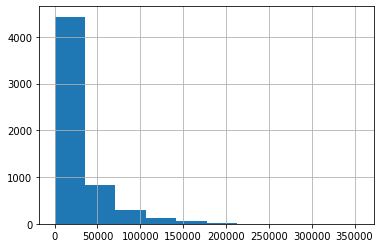

In [ ]:
df_reviews['공감수'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

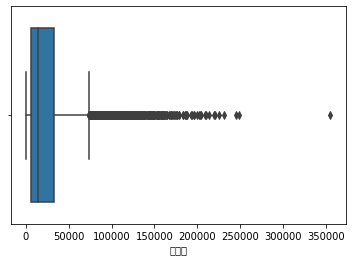

In [ ]:
sns.boxplot(df_reviews['공감수'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

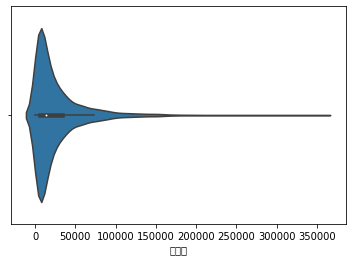

In [ ]:
sns.violinplot(df_reviews['공감수'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

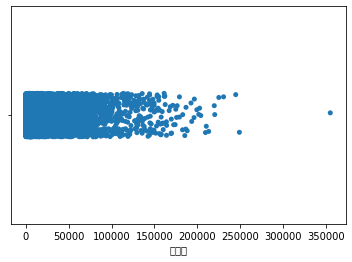

In [ ]:
sns.stripplot(df_reviews['공감수'])

In [ ]:
sns.swarmplot(df_reviews['공감수'])

### 전체 웹툰의 최신화 베스트 댓글 크롤링

In [ ]:

reviews = {
    '댓글' : [],
    '공감수' : [],
    '비공감수' : [], 
    '제목' : []
    }

for title, info in tqdm(toon_info.items()):

    print(title)

    title_id = info['title_id']
    no = info['no']

    url = 'https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json?'


    params ={
            'ticket' : 'comic',  
            'templateId' : 'webtoon',  
            'pool' : 'cbox3',  
            '_callback' : '', # jQuery112409091552467251651_1615854232166 -> ''  
            'lang' : 'ko',  
            'country' : 'KR',  
            'objectId' : f'{title_id}_{no}', # 웹툰의 고유 아이디_해당화 인덱스  
            'pageSize' : 15,  
            'indexSize' : 10,  
            'listType' : 'OBJECT',  
            'pageType' : 'default',  
            'page' : 1, # 전체댓글의 페이지 번호 
            'refresh' : 'true',  
            }

    headers = {
            'referer': 'https://comic.naver.com/comment/comment.nhn?titleId=650305&no=298',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.146 Safari/537.36'
            }

    resp = requests.get(url, params=params, headers=headers)

    jsn = resp.text[10:-2]

    dict_resp = json.loads(jsn)
    dict_resp 

    commentList = dict_resp['result']['commentList']
    # len(commentList)

    for comment in commentList:
        reviews['댓글'].append(comment['contents'])
        reviews['공감수'].append(comment['sympathyCount'])
        reviews['비공감수'].append(comment['antipathyCount'])
        reviews['제목'].append(title)

  0%|          | 0/550 [00:00<?, ?it/s]

참교육
뷰티풀 군바리
퀘스트지상주의
장씨세가 호위무사
윈드브레이커
퍼니게임
팔이피플
신화급 귀속 아이템을 손에 넣었다
버림받은 왕녀의 은밀한 침실
호랑신랑뎐
앵무살수
소녀의 세계
잔불의 기사
백수세끼
똑 닮은 딸
사이다걸
절대검감
히어로메이커
물어보는 사이
리턴 투 플레이어
꼬리잡기
인섹터
순정말고 순종
북부 공작님을 유혹하겠습니다
헬크래프트
더블클릭
결혼생활 그림일기
또다시, 계약 부부
아, 쫌 참으세요 영주님!
도깨비 부른다
황제와의 하룻밤
랭커
오빠집이 비어서
제왕: 빛과 그림자
퇴근 후에 만나요
꿈의 기업
불청객
파운더
이제야 연애
미니어처 생활백서
아슈타르테
우산 없는 애
하루의 하루
수영만화일기
신군
다시쓰는 연애사
원작은 완결난 지 한참 됐습니다만
레지나레나 - 용서받지 못한 그대에게
굿바이 유교보이
그림자 신부
오늘의 비너스
메리의 불타는 행복회로
입술이 예쁜 남자
버그이터
최후의 금빛아이
백호랑
파견체
행운을 부탁해!
아마도
달로 만든 아이
모스크바의 여명
루크 비셸 따라잡기
세번째 로망스
나만의 고막남친
매지컬 급식:암살법사
경비실에서 안내방송 드립니다
지옥연애환담
악녀 18세 공략기
역주행!
모노마니아
슈퍼스타 천대리
사막에 핀 달
흔들리는 세계로부터
결혼공략
디나운스
오로지 오로라
별을 쫓는 소년들
김부장
대학원 탈출일지
내가 키운 S급들
여신강림
마루는 강쥐
1을 줄게
멸망 이후의 세계
하루만 네가 되고 싶어
중증외상센터 : 골든 아워
용사가 돌아왔다
삼국지톡
헬58
천마는 평범하게 살 수 없다
악몽의 형상
집이 없어
랜덤채팅의 그녀!
하북팽가 막내아들
시체기사 군터
호랑이 들어와요
초인의 게임
사표내고 이계에서 힐링합니다
올가미
웅크
원주민 공포만화
윌유메리미
덴큐
나타나주세요!
애옹식당
용왕님의 셰프가 되었습니다
늑대처럼 홀로
왕게임
헥토파스칼
견우와 선녀
택배 왔습니다
로잘린 보가트
빅맨
에이머
은주의 방 2~3부
빌런투킬
사공은주
플레이, 플리
아이즈
또 다른 사랑
내남친 킹카만들기
나의 플랏메이트
벽간소음
제로게임
여우자매
풋내

In [ ]:
toon_all_rev = pd.DataFrame(reviews)
toon_all_rev

,댓글,공감수,비공감수,제목
0,저 비키니가 되고싶어요 저 비키니가 되고싶어요 저 비키니가 되고싶어요 저 비키니가 ...,8720,698,참교육
1,아니...비키니를 입힐거면 갖다대지만 말고 제대로 입혀야죠....\n\n바다. 기대...,6578,313,참교육
2,주님 부처님 알라신님 오늘 좀 많이 갈거 같습니다,5806,42,참교육
3,신 등장,4591,22,참교육
4,저 학생의 입장에선\n임한림이 신이다.\n\n앞으로의 인생에 계속 기억되고 고마운 ...,2808,17,참교육
...,...,...,...,...
5384,아 설마 저번에 기도하던게 산호쪽이 아니라 준영이가 죽길 기도하던거였나,569,3,"구해줘, 호구!"
5385,아 할배 나가라고요ㅠㅠ..!!,286,1,"구해줘, 호구!"
5386,아 그냥 둘이 행복하게해주세요ㅠㅠ,173,0,"구해줘, 호구!"
5387,자기 손자 살리겠다고 준영이 이용한겨?ㄷㄷ,127,0,"구해줘, 호구!"
